In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import pearsonr, spearmanr
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## Problem 1

In [74]:
arr1 = []
arr2 = []
for i in range(100):
    arr1.append(i**0.03)
    arr2.append(i)
print(pearsonr(arr1,arr2)[0])
print(spearmanr(arr1,arr2)[0])

0.3993706676999625
0.9999999999999999


## Problem 2

In [84]:
arr3 = []
arr4 = []
for i in range(20):
    arr3.append(i)
    arr4.append(i+10)

for i in range(20, 101):
    arr3.append(-i+10000)
    arr4.append(i+10000)
print(pearsonr(arr3,arr4)[0])
print(spearmanr(arr3,arr4)[0])

0.9999446243702268
-0.03156668608037274


## Problem 3

In [20]:
df = pd.read_csv('healthy_breast.tsv', sep='\t', index_col=0)
#df = df.T
print(df)

                              TCGA-A7-A0CE-11A  TCGA-A7-A0CH-11A  \
A1BG                                  0.122859          0.142719   
A1BG-AS1                              1.049671          0.882241   
A2M                                   8.090392          7.885307   
A2M-AS1                               0.665384          1.282487   
A2ML1                                 0.261259          0.314423   
...                                        ...               ...   
ZYX                                   6.371936          6.367397   
ZZEF1                                 2.209258          2.410795   
ZZZ3                                  2.670788          2.276586   
chr22-38_28785274-29006793.1          0.036388          0.021537   
pk                                    2.940599          3.199174   

                              TCGA-A7-A0D9-11A  TCGA-A7-A13F-11A  \
A1BG                                  0.042942          0.130964   
A1BG-AS1                              0.372585 

In [21]:
df['Spearman'] = [spearmanr(df.loc[gene], df.loc['SPI1']) [0] for gene in df.index]
df

,TCGA-A7-A0CE-11A,TCGA-A7-A0CH-11A,TCGA-A7-A0D9-11A,TCGA-A7-A13F-11A,TCGA-A7-A13G-11A,TCGA-AC-A23H-11A,TCGA-AC-A2FB-11A,TCGA-AC-A2FF-11A,TCGA-AC-A2FM-11B,TCGA-BH-A0AU-11A,...,TCGA-E9-A1R7-11A,TCGA-E9-A1RB-11A,TCGA-E9-A1RC-11A,TCGA-E9-A1RD-11A,TCGA-E9-A1RF-11A,TCGA-E9-A1RH-11A,TCGA-E9-A1RI-11A,TCGA-GI-A2C8-11A,TCGA-GI-A2C9-11A,Spearman
A1BG,0.122859,0.142719,0.042942,0.130964,0.026263,0.146388,0.082280,0.169078,0.266636,0.251960,...,0.044415,0.089002,0.030335,0.068472,0.063510,0.048162,0.072965,0.043065,0.180766,-0.277758
A1BG-AS1,1.049671,0.882241,0.372585,1.030442,0.299306,0.828991,0.938558,1.132839,1.362363,1.040175,...,0.633134,0.682816,0.307689,0.684830,0.193389,0.400497,0.322244,0.148803,0.870311,-0.128887
A2M,8.090392,7.885307,8.544928,7.791441,8.407390,8.071708,8.322183,7.969582,7.356572,7.228970,...,8.417611,7.864779,8.407556,8.140207,8.332565,8.417941,7.895748,7.544923,7.688153,0.539030
A2M-AS1,0.665384,1.282487,1.631419,1.640940,2.238244,1.437999,1.298605,0.999888,0.838636,0.855256,...,1.557140,1.437071,2.312896,1.698707,1.695556,1.498628,2.321666,1.786751,0.531282,0.059126
A2ML1,0.261259,0.314423,0.369251,0.143067,0.070918,0.384080,0.170179,0.211175,0.055803,0.053366,...,0.176132,0.190882,0.106923,0.069723,0.073296,0.124918,0.131874,0.035528,0.185603,0.001799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYX,6.371936,6.367397,5.319915,6.125344,5.156724,6.172801,6.606829,5.994754,7.453722,5.538677,...,5.527371,5.179870,5.234595,5.376909,5.357602,5.472543,5.308752,5.157283,6.241381,0.325330
ZZEF1,2.209258,2.410795,2.952599,2.797119,2.722482,2.410011,2.604595,2.681670,2.032122,2.802142,...,2.824098,2.783537,2.960695,2.696736,2.865028,2.709056,2.947528,3.448019,2.520257,-0.171391
ZZZ3,2.670788,2.276586,2.514337,2.768681,2.539525,3.201114,2.892393,2.975272,2.251998,3.104669,...,2.985900,3.062867,2.621055,2.906315,2.868364,2.707493,2.935547,2.794055,2.656289,-0.566837
chr22-38_28785274-29006793.1,0.036388,0.021537,0.017655,0.024844,0.017465,0.038797,0.026606,0.033123,0.022405,0.030205,...,0.026593,0.029664,0.018891,0.021157,0.033125,0.024941,0.031859,0.013527,0.032806,-0.035124


In [23]:
df.drop('SPI1')
coexpressed_genes = df.loc[df['Spearman'] >= 0.8]
print(coexpressed_genes.index.values)

['ADAP2' 'AIF1' 'ALOX5AP' 'ARHGAP30' 'ARPC1B' 'ARRB2' 'C19orf38' 'C1QA'
 'C1QB' 'C1QC' 'C3AR1' 'CCR1' 'CD14' 'CD300A' 'CD300C' 'CD300LB' 'CD33'
 'CD4' 'CD74' 'CD86' 'CFP' 'CLEC10A' 'CORO7' 'COTL1' 'CRYBB1' 'CSF1R'
 'CTSB' 'CYTH4' 'DOK2' 'DOK3' 'FCER1G' 'FERMT3' 'FGD2' 'FGR' 'FMNL1'
 'GPSM3' 'HAVCR2' 'HCK' 'HCLS1' 'HCST' 'HK3' 'HLA-DMB' 'IL10RA' 'IRF5'
 'ITGAM' 'ITGB2' 'KCNAB2' 'LAPTM5' 'LGALS9' 'LILRA5' 'LILRA6' 'LILRB1'
 'LILRB2' 'LILRB3' 'LILRB4' 'LINC01272' 'LRRC25' 'LYL1' 'MILR1' 'MYO1F'
 'NCF1' 'NCF1B' 'NCF1C' 'NCF2' 'NCF4' 'NCKAP1L' 'NFAM1' 'P2RY6' 'PARVG'
 'PIK3R5' 'PLEK' 'PTAFR' 'SELPLG' 'SIGLEC7' 'SIGLEC9' 'SIRPB2' 'SLC11A1'
 'SLC15A3' 'SLC37A2' 'SLC7A7' 'SPI1' 'TBXAS1' 'TGFB1' 'THEMIS2'
 'TNFAIP8L2' 'TYROBP' 'VAV1' 'WAS']


## Problem 4

In [26]:
data = pd.read_csv('BRCA_pam50.tsv', sep='\t', index_col=0)
data

,UBE2T,BIRC5,NUF2,CDC6,CCNB1,TYMS,MYBL2,CEP55,MELK,NDC80,...,NAT1,FOXA1,BLVRA,MMP11,GPR160,FGFR4,GRB7,TMEM45B,ERBB2,Subtype
TCGA-A1-A0SB-01A,2.507502,2.172270,0.952906,1.683162,3.108067,3.332448,2.982268,1.613604,1.641565,1.218495,...,0.926850,2.869065,3.896839,1.387963,1.141875,0.544443,2.942855,0.875017,5.014075,Normal-like
TCGA-A1-A0SD-01A,3.016158,2.514871,1.509129,1.354016,3.685035,2.125453,3.047474,2.333704,1.996853,1.171520,...,4.905805,6.677118,5.044878,5.631087,3.942169,3.404177,3.655783,2.757977,5.999041,Luminal A
TCGA-A1-A0SE-01A,4.626989,3.289047,2.102190,2.116975,4.525954,2.906470,3.798966,2.745027,2.451070,2.070499,...,6.053451,6.690114,5.843557,5.504526,3.881691,1.038253,3.156081,1.355837,5.585759,Luminal A
TCGA-A1-A0SF-01A,3.417782,2.262844,1.569301,1.800667,3.823694,2.843952,3.807282,2.141323,2.082400,1.693568,...,6.883599,6.280921,5.705410,3.511572,4.374803,2.299735,3.054917,1.315680,5.215699,Luminal A
TCGA-A1-A0SG-01A,2.948244,2.298689,1.116282,1.552142,3.582144,2.886328,2.697313,1.968233,1.662241,1.280947,...,1.814486,6.284076,4.622443,6.845350,3.381032,3.586285,2.845107,3.359571,5.786065,Luminal A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-BH-A0BV-11A,1.870352,1.072286,0.608802,0.902198,2.587268,2.266861,1.450288,0.952375,0.914605,0.726684,...,2.266702,4.919079,4.153488,0.861931,2.403286,0.401022,4.044734,1.569947,4.871977,Healthy
TCGA-BH-A0BC-11A,1.739019,1.219743,0.573760,0.935661,1.957932,2.211228,1.837159,1.142789,0.948133,0.433871,...,1.798099,4.237113,4.438927,0.786682,1.765614,0.761287,3.296281,1.124510,4.406197,Healthy
TCGA-BH-A0DD-11A,1.464052,0.597237,0.340499,1.037614,1.665574,1.312091,1.086920,0.623715,0.544445,0.429620,...,2.147100,1.172748,5.040978,0.415481,1.626146,0.113552,0.794801,0.177137,3.166627,Healthy
TCGA-BH-A0DH-11A,1.686862,1.206100,0.259961,0.704237,2.288728,1.789974,1.095518,0.541392,0.526630,0.471734,...,2.361668,4.795254,5.046676,1.342472,1.866943,0.619597,2.776416,1.925006,4.462839,Healthy


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

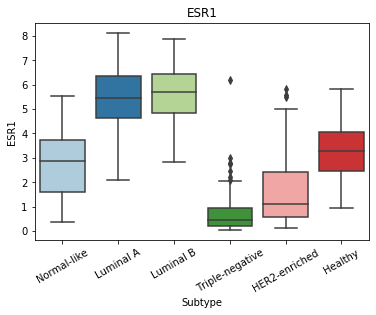

In [30]:
ESR1 = sns.boxplot(x='Subtype', y='ESR1', data=data, palette='Paired')
ESR1.set_title('ESR1')
plt.xticks(rotation=30)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

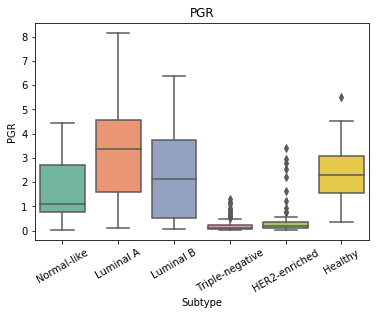

In [32]:
PGR = sns.boxplot(x='Subtype', y='PGR', data=data, palette='Set2')
PGR.set_title('PGR')
plt.xticks(rotation=30)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

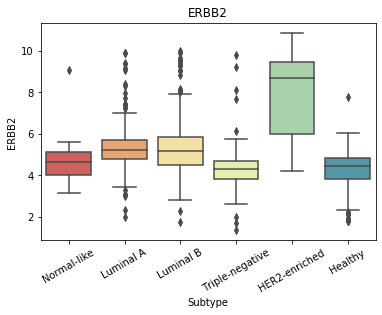

In [33]:
ERBB2 = sns.boxplot(x='Subtype', y='ERBB2', data=data, palette='Spectral')
ERBB2.set_title('ERBB2')
plt.xticks(rotation=30)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

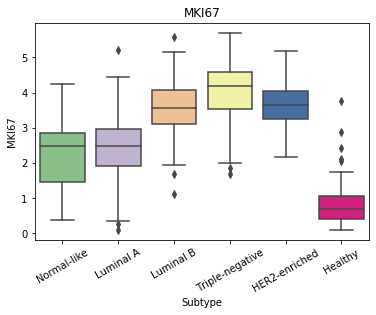

In [34]:
MKI67 = sns.boxplot(x='Subtype', y='MKI67', data=data, palette='Accent')
MKI67.set_title('MKI67')
plt.xticks(rotation=30)

## Problem 5

In [85]:
matrix = pd.read_csv('https://raw.githubusercontent.com/s-a-nersisyan/HSE_bioinformatics_2021/master/seminar14/human_coronavirus_aln_scores.tsv', index_col = 0, sep = '\t')

In [89]:
matrix = 1/matrix

In [91]:
model = TSNE()
matrix[['TSNE1', 'TSNE2']] = TSNE(n_components = 2, perplexity = 30, metric = 'precomputed').fit_transform(matrix)

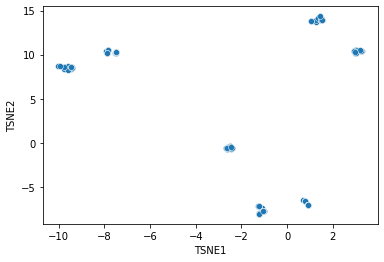

In [93]:
plt.tight_layout()
sns.scatterplot(x = 'TSNE1', y = 'TSNE2', data = matrix)

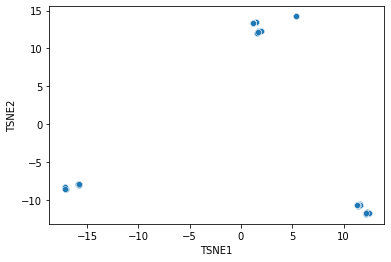

In [96]:
matrix[['TSNE1', 'TSNE2']] = TSNE(n_components = 2, perplexity = 35).fit_transform(matrix)
sns.scatterplot(x = 'TSNE1', y = 'TSNE2', data = matrix)

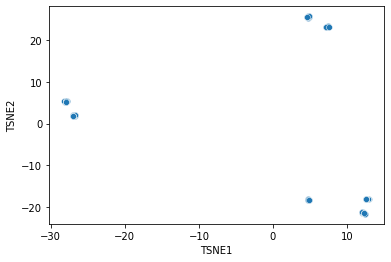

In [97]:
matrix[['TSNE1', 'TSNE2']] = TSNE(n_components = 2, perplexity = 25).fit_transform(matrix)
sns.scatterplot(x = 'TSNE1', y = 'TSNE2', data = matrix)

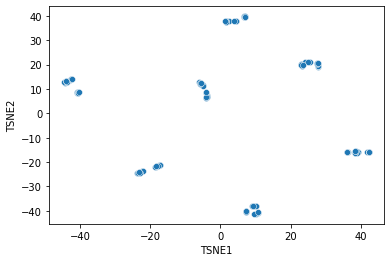

In [98]:
matrix[['TSNE1', 'TSNE2']] = TSNE(n_components = 2, perplexity = 10).fit_transform(matrix)
sns.scatterplot(x = 'TSNE1', y = 'TSNE2', data = matrix)

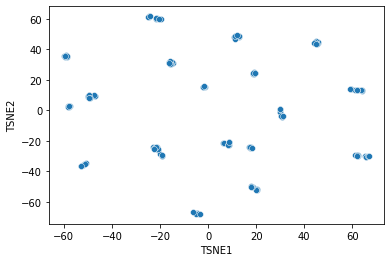

In [99]:
matrix[['TSNE1', 'TSNE2']] = TSNE(n_components = 2, perplexity = 5).fit_transform(matrix)
sns.scatterplot(x = 'TSNE1', y = 'TSNE2', data = matrix)

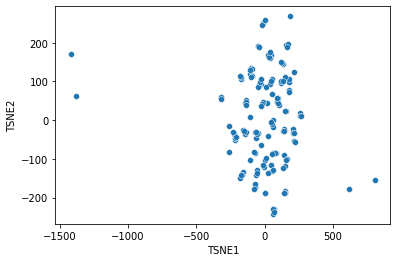

In [100]:
matrix[['TSNE1', 'TSNE2']] = TSNE(n_components = 2, perplexity = 2).fit_transform(matrix)
sns.scatterplot(x = 'TSNE1', y = 'TSNE2', data = matrix)

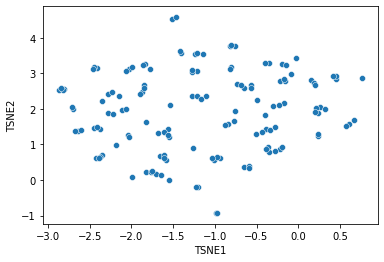

In [101]:
matrix[['TSNE1', 'TSNE2']] = TSNE(n_components = 2, perplexity = 100).fit_transform(matrix)
sns.scatterplot(x = 'TSNE1', y = 'TSNE2', data = matrix)